# Time Series Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data = pd.read_csv('HDFCBANK.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           249 non-null    object
 1   series         249 non-null    object
 2   OPEN           249 non-null    object
 3   HIGH           249 non-null    object
 4   LOW            249 non-null    object
 5   PREV. CLOSE    249 non-null    object
 6   ltp            249 non-null    object
 7   close          249 non-null    object
 8   vwap           249 non-null    object
 9   52W H          249 non-null    object
 10  52W L          249 non-null    object
 11  VOLUME         249 non-null    object
 12  VALUE          249 non-null    object
 13  No of trades   249 non-null    object
dtypes: object(14)
memory usage: 27.4+ KB


In [5]:
data.head()


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,13-Nov-2024,EQ,"1,716.75","1,729.40","1,673.00","1,718.20","1,688.15","1,681.35","1,699.70","1,794.00","1,363.55","1,78,64,250","30,36,39,47,641.30","3,84,592"
1,12-Nov-2024,EQ,"1,772.00","1,775.00","1,708.65","1,766.30","1,719.00","1,718.20","1,731.71","1,794.00","1,363.55","1,56,97,703","27,18,38,31,491.15","4,10,691"
2,11-Nov-2024,EQ,"1,754.55","1,782.80","1,751.20","1,754.45","1,763.90","1,766.30","1,768.85","1,794.00","1,363.55","1,22,82,681","21,72,62,35,735.65","3,66,875"
3,08-Nov-2024,EQ,"1,752.00","1,761.80","1,745.85","1,746.55","1,751.90","1,754.45","1,754.62","1,794.00","1,363.55","99,51,493","17,46,10,70,459.45","2,53,333"
4,07-Nov-2024,EQ,"1,744.30","1,760.95","1,738.00","1,755.25","1,743.50","1,746.55","1,746.60","1,794.00","1,363.55","94,47,728","16,50,13,84,112.80","3,15,964"


In [6]:
data.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [7]:
# Preprocess data
data['Date '] = pd.to_datetime(data['Date '])  
# Convert Date to datetime format
data['close '] = data['close '].replace({',': ''}, regex=True).astype(float)  
# Remove commas and convert to float
data.set_index('Date ', inplace=True)         
# Set Date as index
data = data.sort_index()  

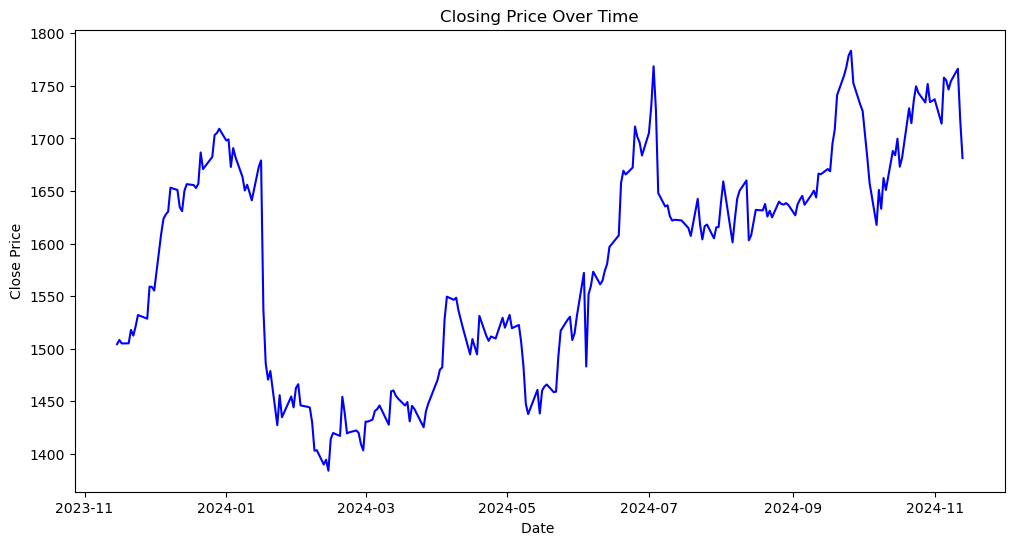

In [8]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['close '], color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date ')
plt.ylabel('Close Price')
plt.show()

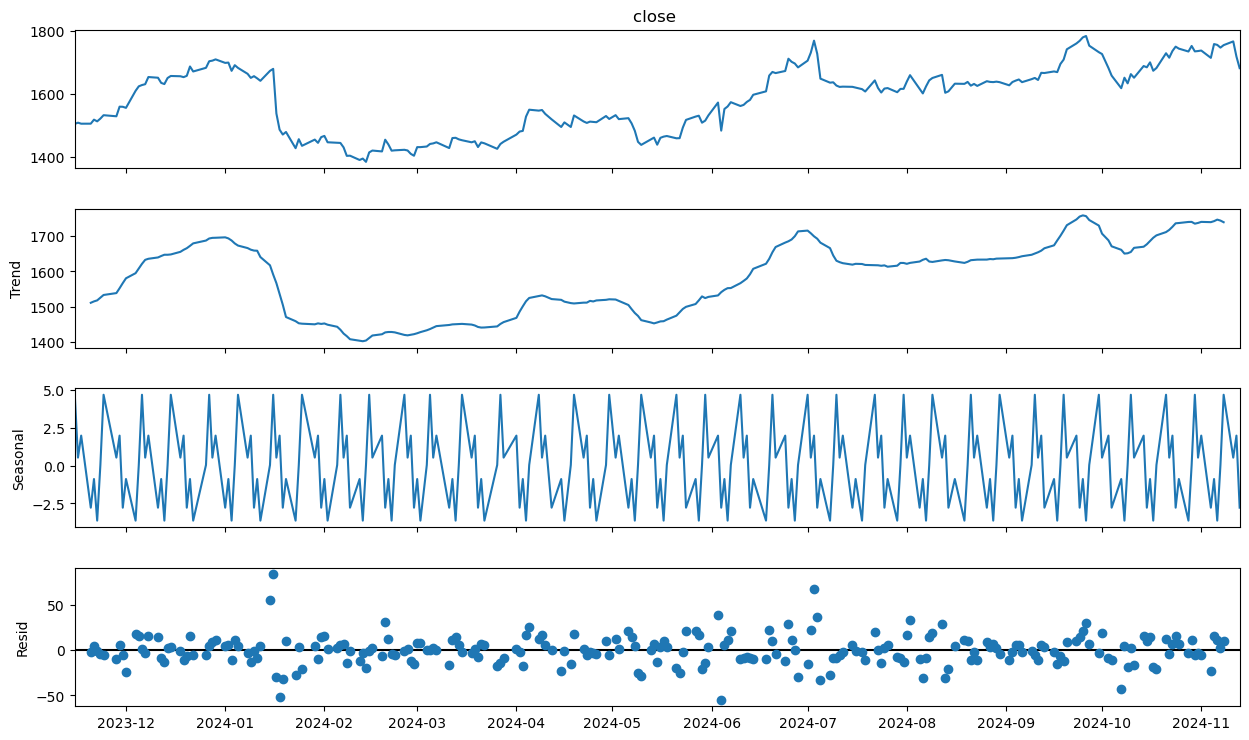

In [11]:
# Decompose the time series to view trend, seasonality, and residuals
decomposition = seasonal_decompose(data['close '], model='additive', period=7)  # Assuming daily data
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

In [16]:
# Build an ARIMA model for forecasting
# Split data into train and test sets
train = data['close '][:-30]  # Use all but the last 30 days for training
test = data['close '][-30:]   # Last 30 days for testing


In [18]:
# Train the ARIMA model
model = ARIMA(train, order=(5, 1, 2))  # (p, d, q) can be adjusted as necessary
arima_result = model.fit()

C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)
forecast.index = pd.date_range(start=test.index[0], periods=30, freq='D')  # Adjust forecast index for 30 days

C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [20]:
# Define the ARIMA model
model = ARIMA(data['close '], order=(1, 2, 1))  #  ACF
arima_result = model.fit()

# Display model summary
print(arima_result.summary())

C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 close    No. Observations:                  249
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1122.269
Date:                Mon, 18 Nov 2024   AIC                           2250.538
Time:                        09:10:10   BIC                           2261.066
Sample:                             0   HQIC                          2254.777
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0067      0.041     -0.162      0.871      -0.088       0.074
ma.L1         -0.9999      1.684     -0.594      0.553      -4.300       2.300
sigma2       506.2600    851.919      0.594      0.5

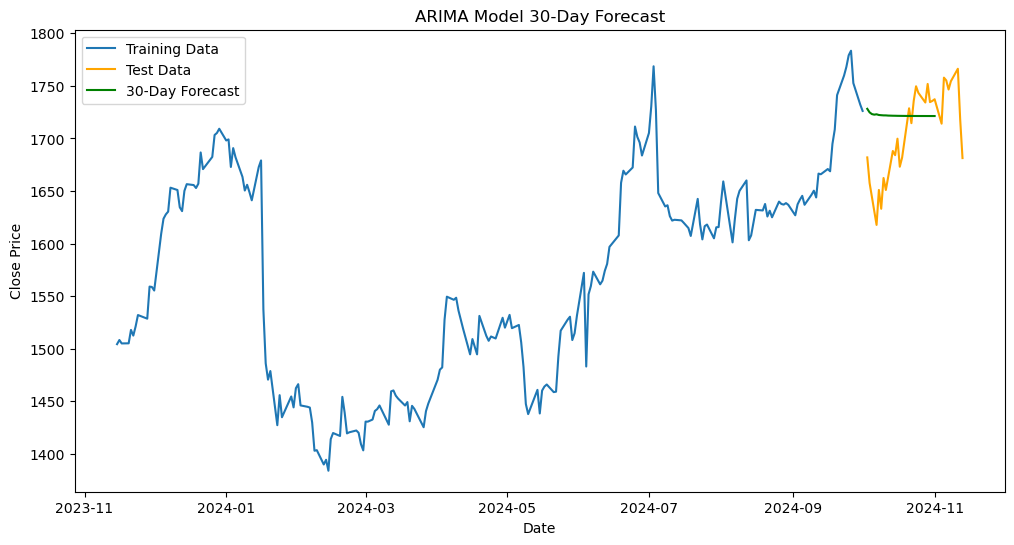

In [21]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='orange')
plt.plot(forecast, label='30-Day Forecast', color='green')
plt.title('ARIMA Model 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [24]:
# Display forecasted values
print("30-Day Forecasted Closing Prices:")
print(forecast)

30-Day Forecasted Closing Prices:
2024-10-03    1728.192836
2024-10-04    1724.817509
2024-10-05    1723.185821
2024-10-06    1722.664471
2024-10-07    1722.995344
2024-10-08    1722.336921
2024-10-09    1722.134850
2024-10-10    1721.964859
2024-10-11    1721.949554
2024-10-12    1721.770612
2024-10-13    1721.709003
2024-10-14    1721.632986
2024-10-15    1721.597878
2024-10-16    1721.537601
2024-10-17    1721.507903
2024-10-18    1721.474462
2024-10-19    1721.453746
2024-10-20    1721.430310
2024-10-21    1721.415540
2024-10-22    1721.400910
2024-10-23    1721.390590
2024-10-24    1721.380713
2024-10-25    1721.373615
2024-10-26    1721.367154
2024-10-27    1721.362269
2024-10-28    1721.357938
2024-10-29    1721.354612
2024-10-30    1721.351728
2024-10-31    1721.349462
2024-11-01    1721.347527
Freq: D, Name: predicted_mean, dtype: float64


# Insights 

1.	Data Preparation:
-	The dataset required cleaning, such as removing commas and converting columns like 'close' to numerical formats.
-	The data was indexed by the Date column and sorted for time-series analysis.

2.	Exploratory Analysis:
-	A time-series plot of the close prices showed the trend and fluctuations over time.

3.	Seasonal Decomposition:
-	Seasonal decomposition revealed components such as trend, seasonality, and residuals, highlighting periodic patterns and irregular variations.

4.	ARIMA Model:
-	The ARIMA model was trained on historical close prices using parameters (5, 1, 2) initially and then refined to (1, 2, 1) based on results.
-	Model performance (AIC: 2250.538, BIC: 2261.066) indicates a reasonable fit, but parameter significance suggests potential model tuning.

5.	Forecasting:
-	A 30-day forecast showed predicted closing prices. While not perfectly accurate (based on Ljung-Box Q and residual diagnostics), the model provides a basis for short-term predictions.

6.	Model Diagnostics:
-	The residuals indicate no significant autocorrelation.
-	Skewness and kurtosis values suggest some deviations from normality, which may influence forecast accuracy.

7.	Visualization:
-	Plots of training data, test data, and the forecast showed the ARIMA model's predictive capabilities.